In [1]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

|  Field   | Description  |
|  ----  | ----  |
|SaleID	|交易ID，唯一编码|
|name	|汽车交易名称，已脱敏|
|regDate	|汽车注册日期，例如20160101，2016年01月01日|
|model	|车型编码，已脱敏|
|brand	|汽车品牌，已脱敏|
|bodyType	|车身类型：豪华轿车：0，微型车：1，厢型车：2，大巴车：3，敞篷车：4，双门汽车：5，商务车：6，搅拌车：7|
|fuelType	|燃油类型：汽油：0，柴油：1，液化石油气：2，天然气：3，混合动力：4，其他：5，电动：6|
|gearbox	|变速箱：手动：0，自动：1|
|power	|发动机功率：范围 [ 0, 600 ]|
|kilometer	|汽车已行驶公里，单位万km|
|notRepairedDamage	|汽车有尚未修复的损坏：是：0，否：1|
|regionCode	|地区编码，已脱敏|
|seller	|销售方：个体：0，非个体：1|
|offerType	|报价类型：提供：0，请求：1|
|creatDate	|汽车上线时间，即开始售卖时间|
|price	|二手车交易价格（预测目标）|
|v系列特征	|匿名特征，包含v0-14在内15个匿名特征|

In [2]:
df_train = pd.read_csv('./data/used_car_train_20200313.csv',sep=' ')
df_test = pd.read_csv('./data/used_car_testA_20200313.csv',sep=' ')

## 查看数据总览

In [3]:
# 50000条数据
df_train.head().append(df_test.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,...,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353
49999,199999,193384,20041109,166.0,6,1.0,NaN,1.0,68,9.0,...,0.228730,0.000300,0.103534,0.080625,0.124264,2.914571,-1.135270,0.547628,2.094057,-1.552150


In [4]:
df_train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48587 non-null  float64
 6   fuelType           47107 non-null  float64
 7   gearbox            48090 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [7]:
print(df_train.shape)
print(df_test.shape)

(150000, 31)
(50000, 30)


## 查看数据缺失情况

### 缺失量与缺失率

In [8]:
print('========train_set========')
train_count = len(df_train)
test_count = len(df_test)
for column in df_train.columns:
    miss_count = df_train[column].isnull().sum()
    miss_rate = miss_count/train_count
    if miss_rate > 0:
        print(f'【{column}】 miss_count:{miss_count},miss_rate:{round(miss_rate,5)}')
print()
print('========test_set========')
for column in df_test.columns:
    miss_count = df_test[column].isnull().sum()
    miss_rate = miss_count/test_count
    if miss_rate > 0:
        print(f'【{column}】 miss_count:{miss_count},miss_rate:{round(miss_rate,5)}')

========train_set========
【model】 miss_count:1,miss_rate:1e-05
【bodyType】 miss_count:4506,miss_rate:0.03004
【fuelType】 miss_count:8680,miss_rate:0.05787
【gearbox】 miss_count:5981,miss_rate:0.03987

========test_set========
【bodyType】 miss_count:1413,miss_rate:0.02826
【fuelType】 miss_count:2893,miss_rate:0.05786
【gearbox】 miss_count:1910,miss_rate:0.0382


In [9]:
# 缺失值主要存在于 fuelType（燃油类型）,bodyType（车身类型）,gearbox（变速箱） 

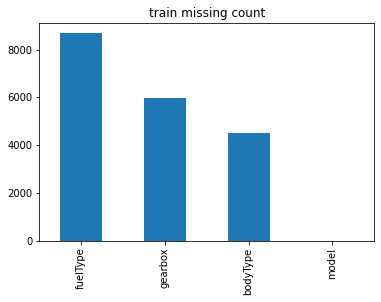

In [10]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)
missing.plot.bar()
plt.title('train missing count')
plt.show()

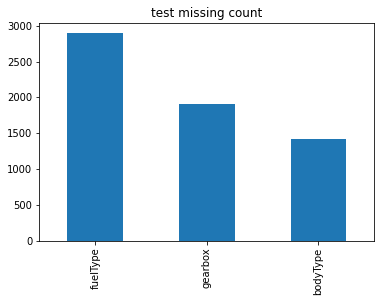

In [11]:
missing = df_test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)
missing.plot.bar()
plt.title('test missing count')
plt.show()

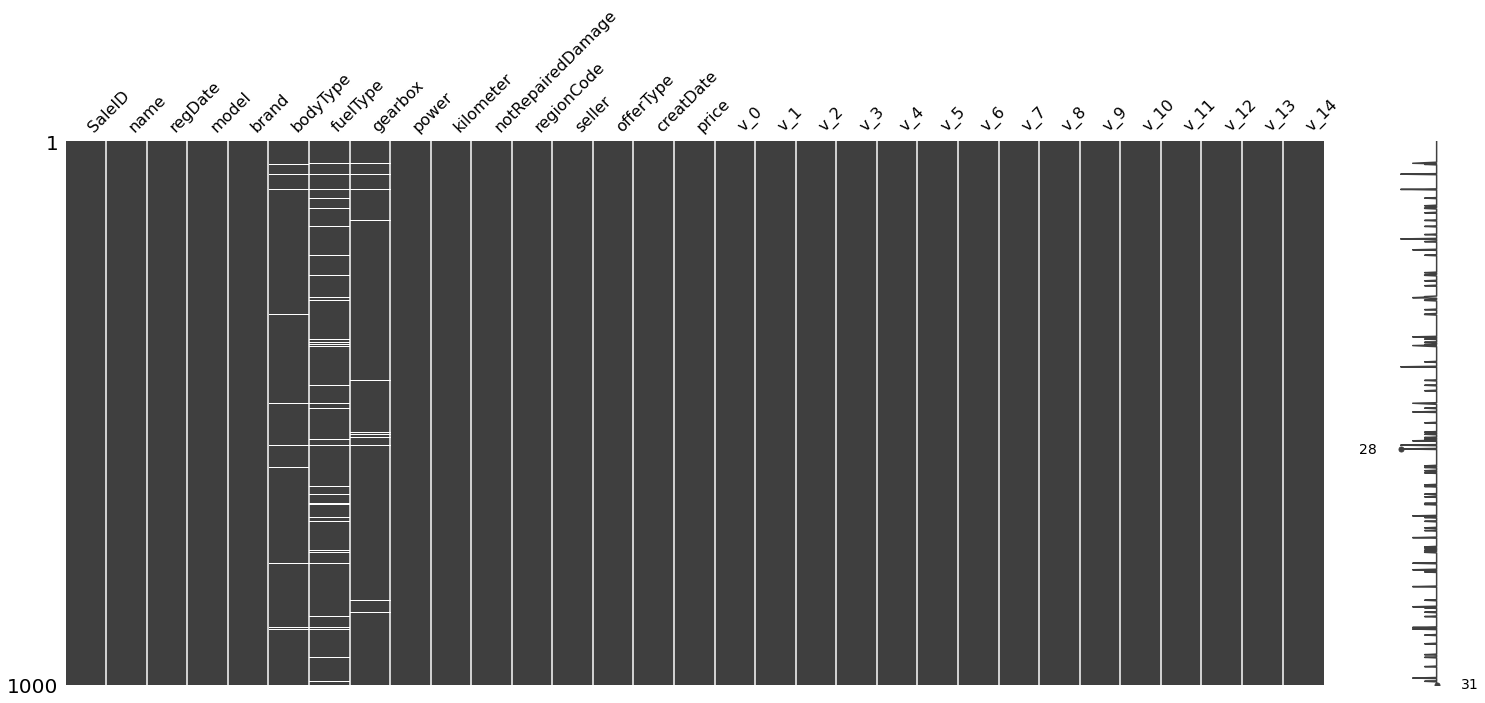

In [12]:
msno.matrix(df_train.sample(1000))

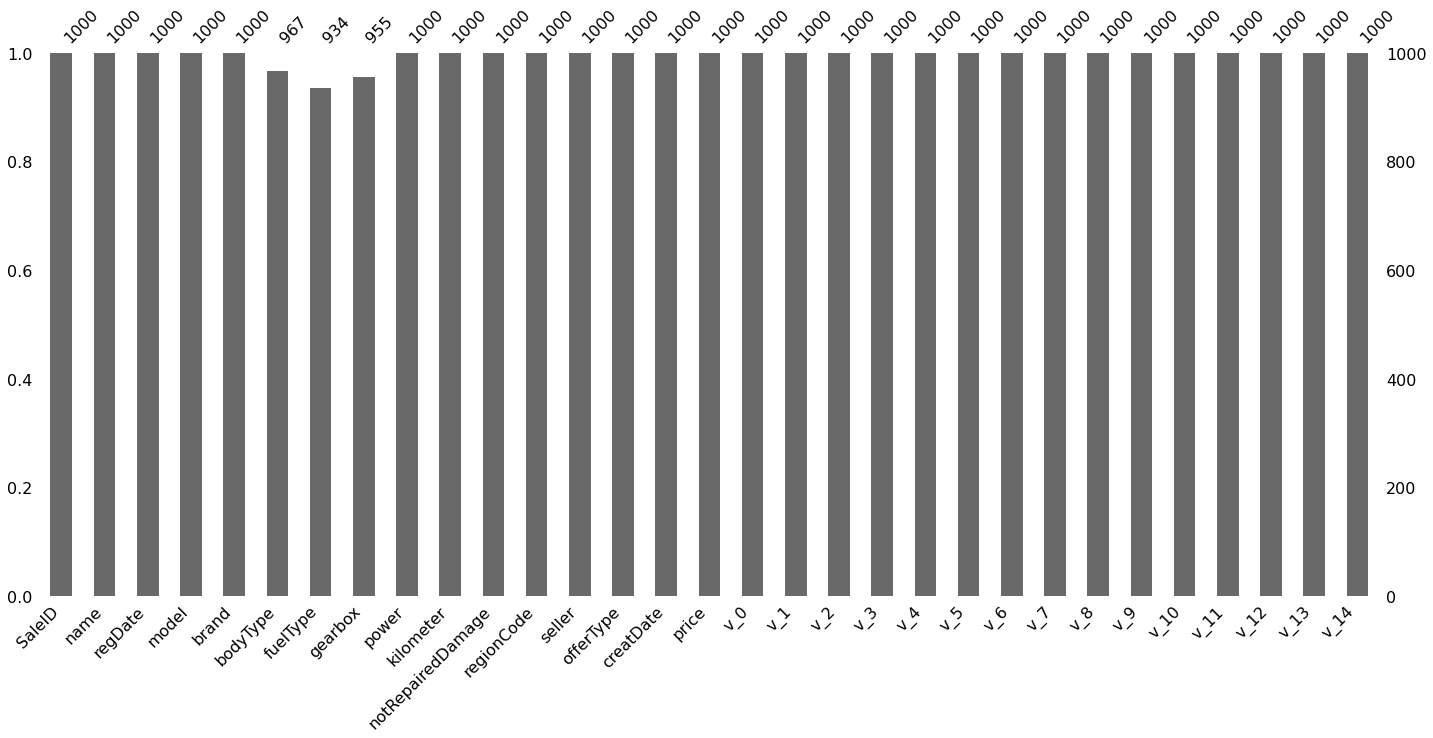

In [13]:
msno.bar(df_train.sample(1000))

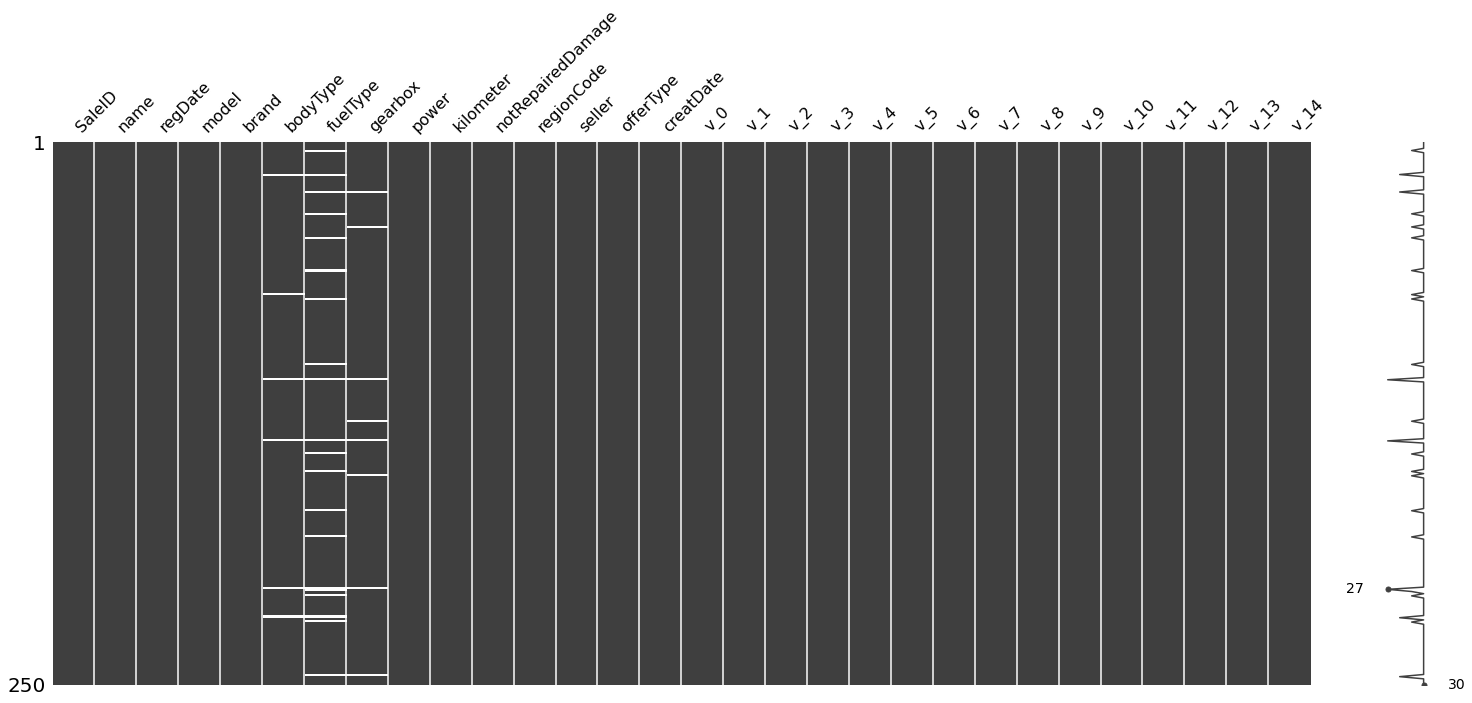

In [14]:
msno.matrix(df_test.sample(250))

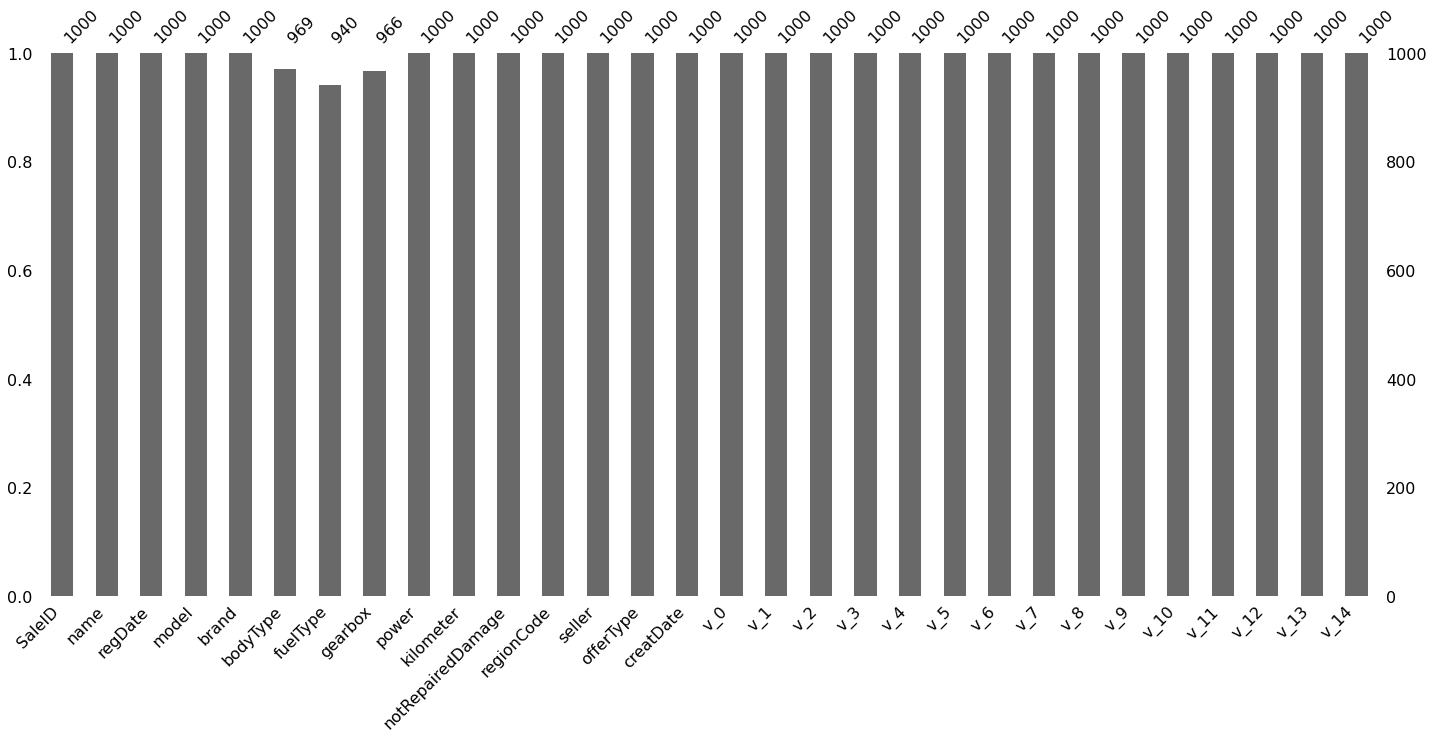

In [15]:
msno.bar(df_test.sample(1000))

### 缺失相关性

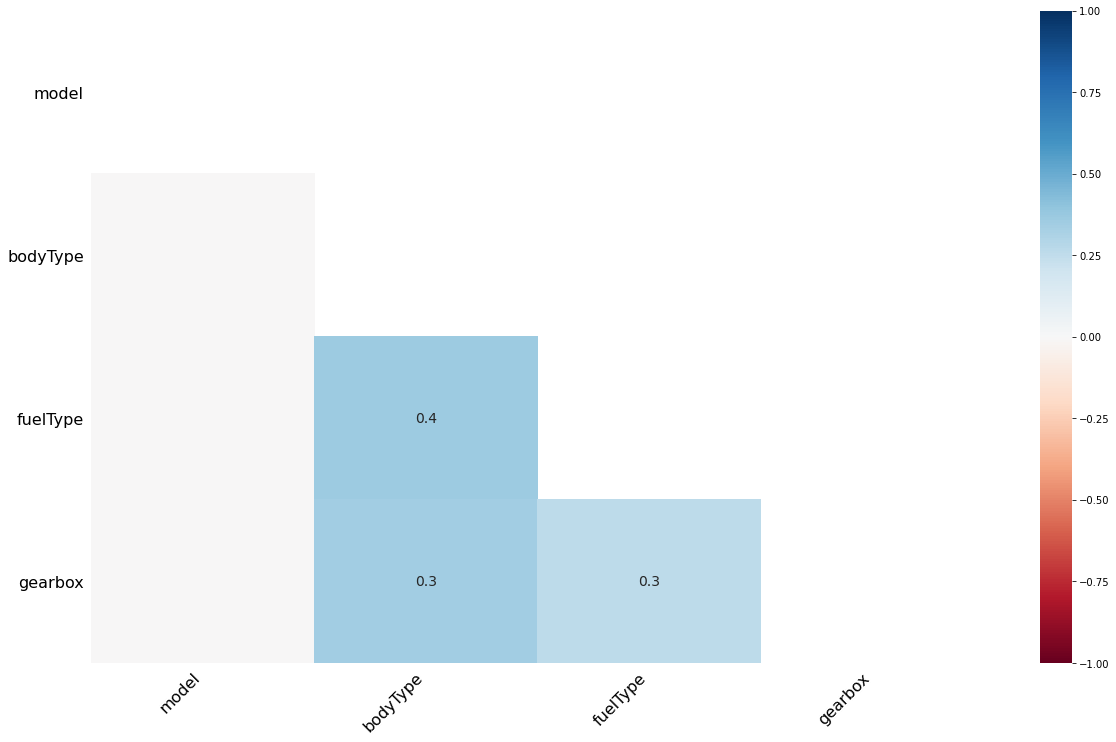

In [16]:
msno.heatmap(df_train)

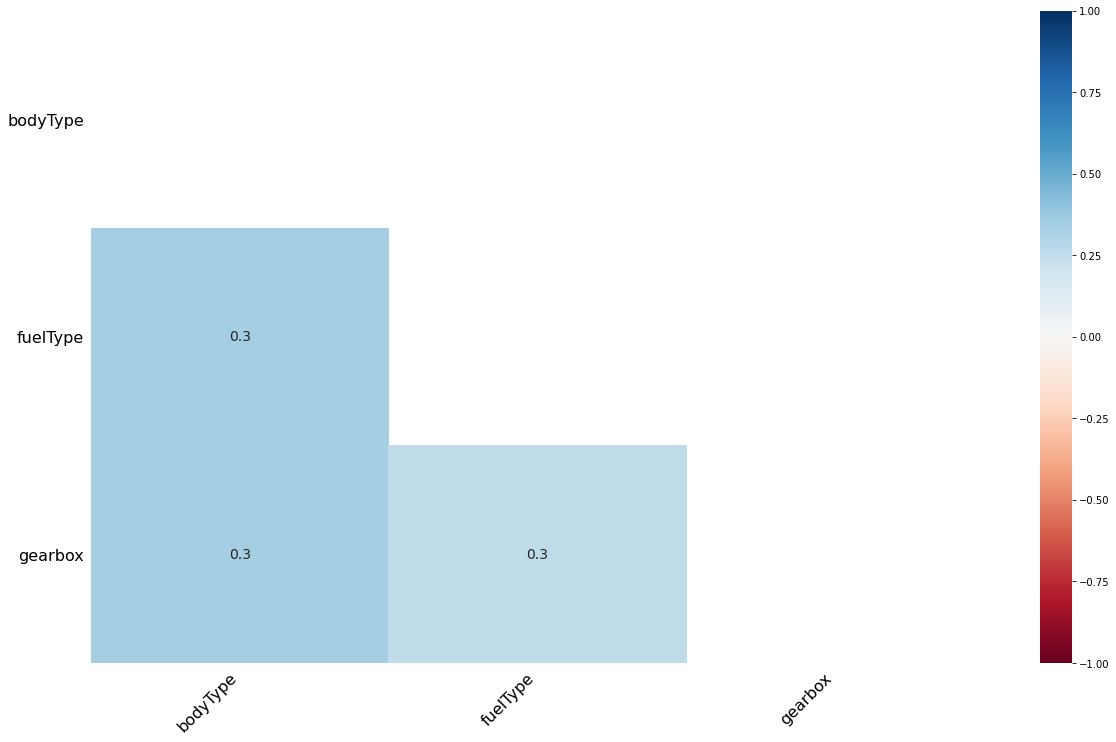

In [17]:
msno.heatmap(df_test)

## 异常数据处理

In [18]:
df_train['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [19]:
df_test['notRepairedDamage'].value_counts()

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

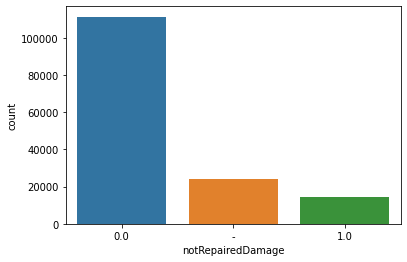

In [20]:
sns.countplot(x='notRepairedDamage', data=df_train,
              order=df_train['notRepairedDamage'].value_counts().index)

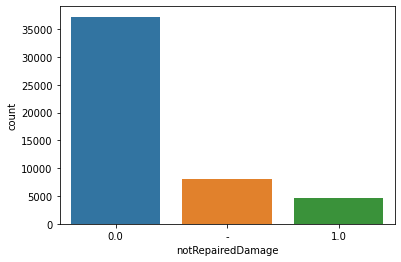

In [21]:
sns.countplot(x='notRepairedDamage',data=df_test,order=df_test['notRepairedDamage'].value_counts().index)

In [22]:
# 将-替换成空值
df_train['notRepairedDamage'].replace('-', np.nan, inplace=True)
df_test['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [23]:
# 替换后再次查看缺失情况
print('========train_set========')
train_count = len(df_train)
test_count = len(df_test)
for column in df_train.columns:
    miss_count = df_train[column].isnull().sum()
    miss_rate = miss_count/train_count
    if miss_rate > 0:
        print(f'【{column}】 miss_count:{miss_count},miss_rate:{round(miss_rate,5)}')
print()
print('========test_set========')
for column in df_test.columns:
    miss_count = df_test[column].isnull().sum()
    miss_rate = miss_count/test_count
    if miss_rate > 0:
        print(f'【{column}】 miss_count:{miss_count},miss_rate:{round(miss_rate,5)}')

========train_set========
【model】 miss_count:1,miss_rate:1e-05
【bodyType】 miss_count:4506,miss_rate:0.03004
【fuelType】 miss_count:8680,miss_rate:0.05787
【gearbox】 miss_count:5981,miss_rate:0.03987
【notRepairedDamage】 miss_count:24324,miss_rate:0.16216

========test_set========
【bodyType】 miss_count:1413,miss_rate:0.02826
【fuelType】 miss_count:2893,miss_rate:0.05786
【gearbox】 miss_count:1910,miss_rate:0.0382
【notRepairedDamage】 miss_count:8031,miss_rate:0.16062


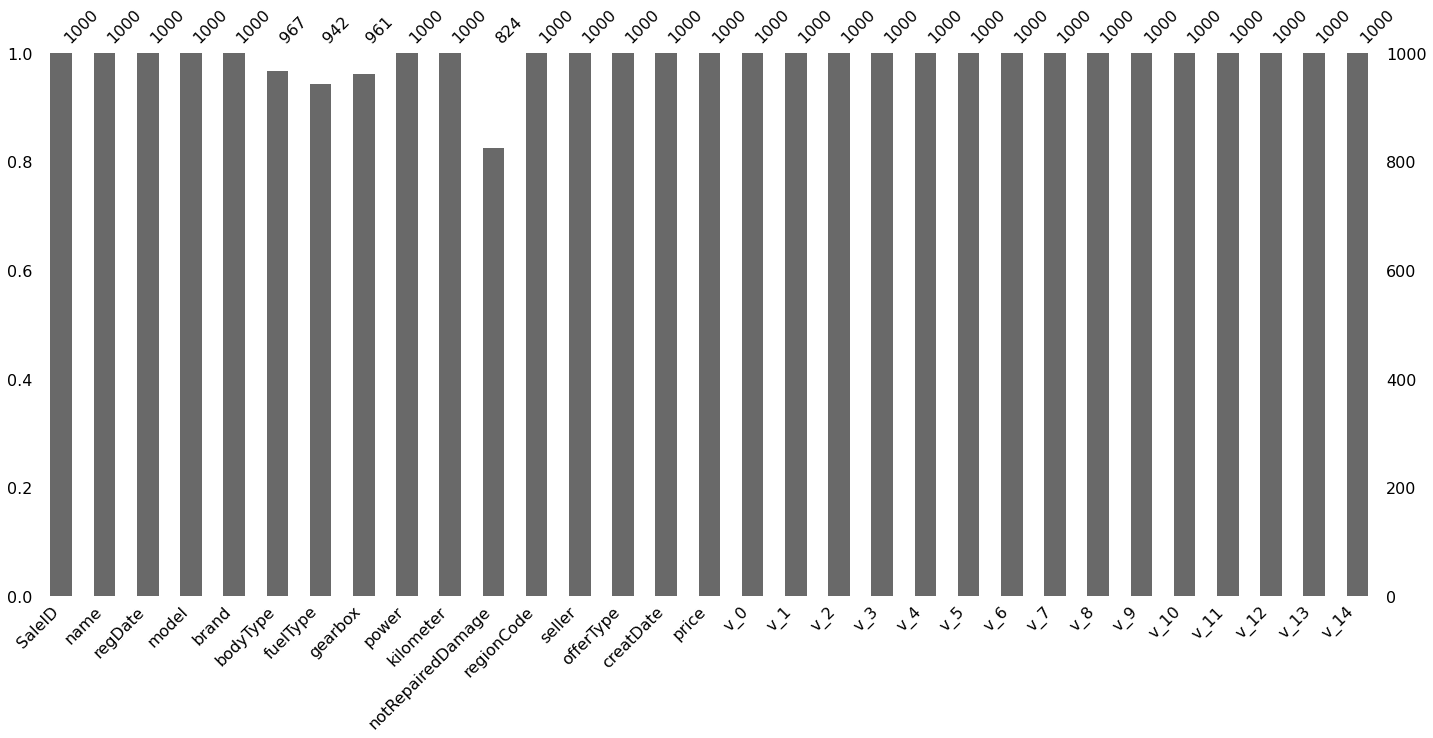

In [24]:
msno.bar(df_train.sample(1000))

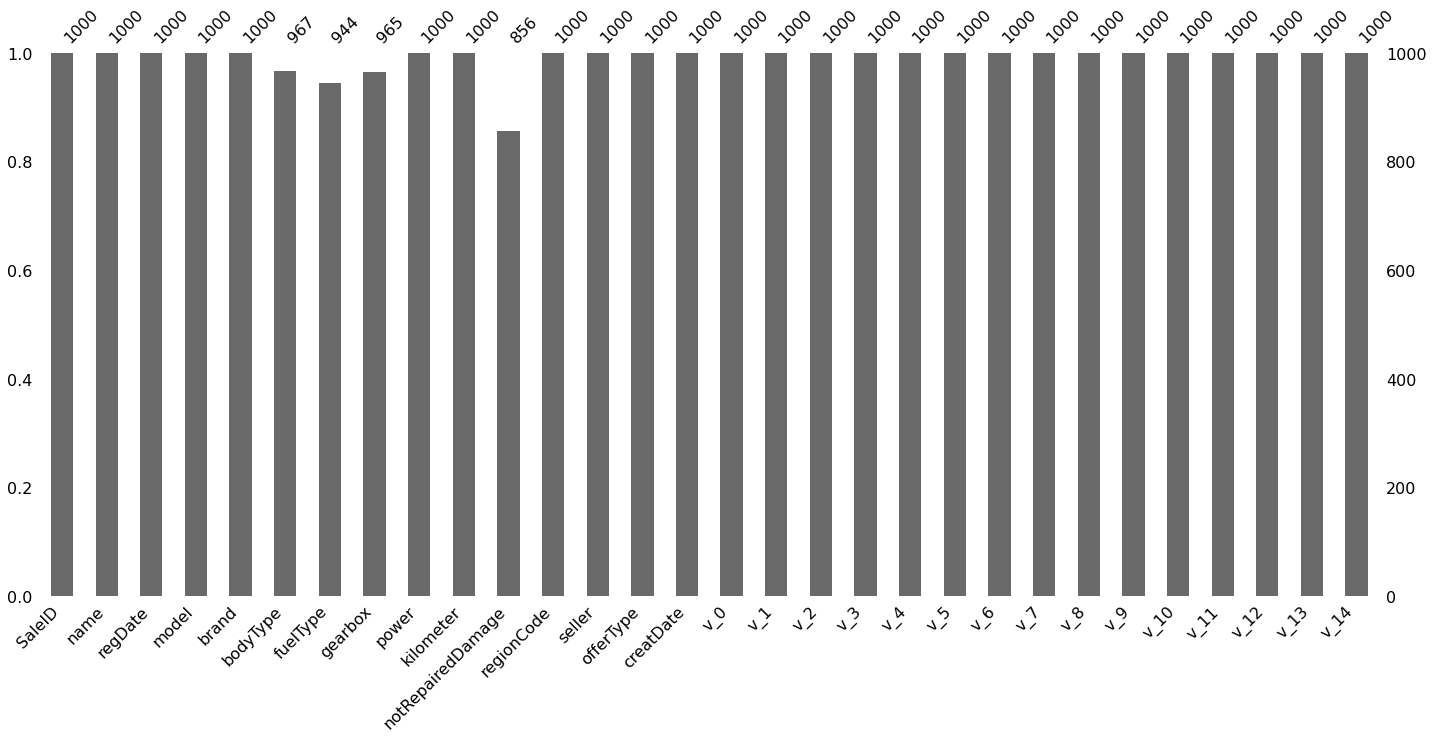

In [25]:
msno.bar(df_test.sample(1000))

## 删除异常特征

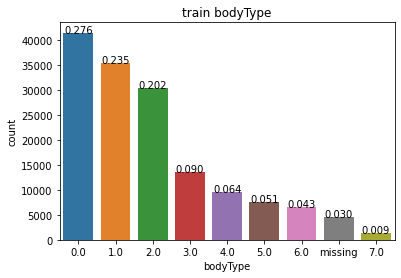

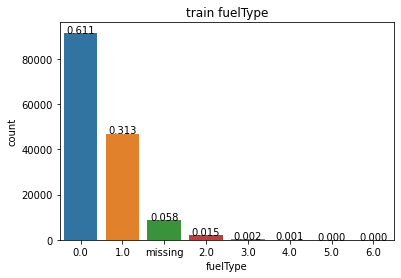

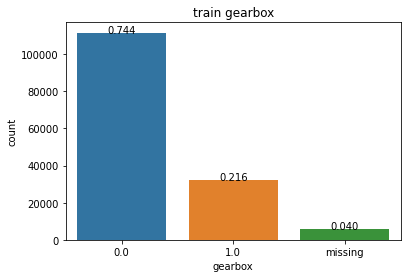

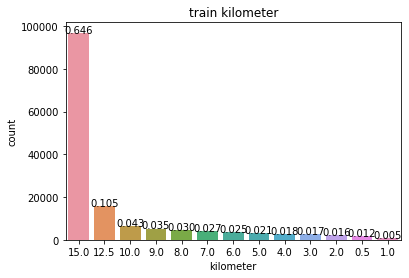

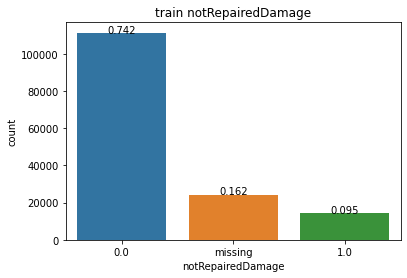

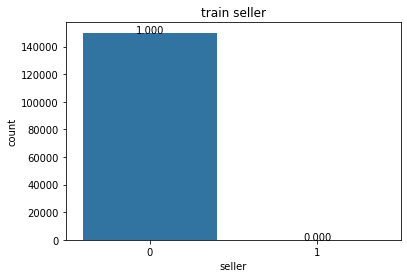

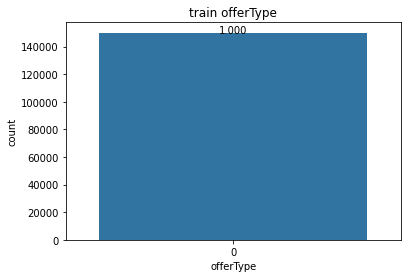

In [26]:
for column in df_train.columns:
    if df_train[column].unique().shape[0] < 20:
        tmp = df_train[[column]].copy()
        tmp.fillna('missing', inplace=True)
        ax = sns.countplot(x=column, data=tmp,
                           order=tmp[column].value_counts().index)
        for p in ax.patches:
            height = p.get_height()
            x = p.get_x()+p.get_width()/2
            y = height + 4
            percentage = '{:1.3f}'.format(height/df_train.shape[0])
            ax.text(x, y, percentage, ha="center")
        plt.title(f'train {column}')
        plt.show()

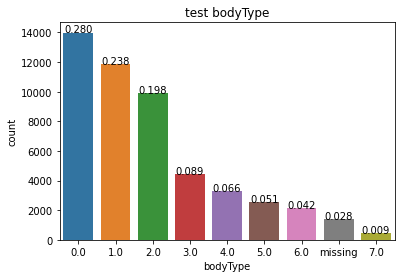

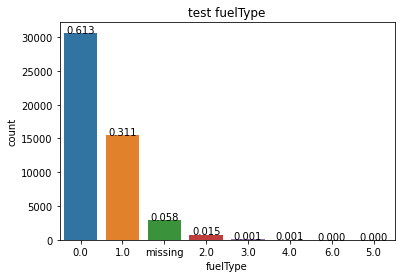

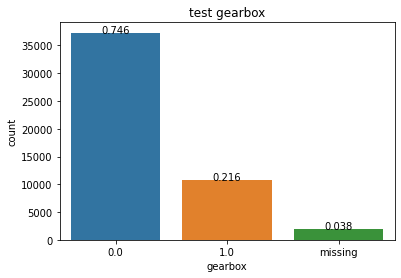

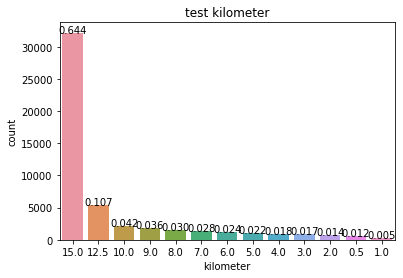

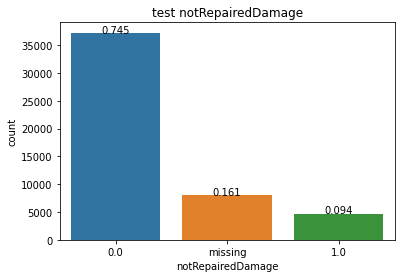

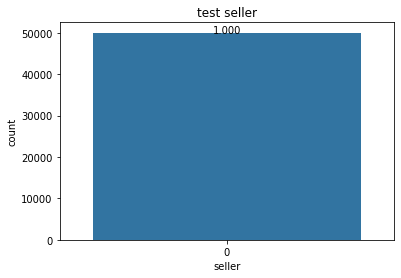

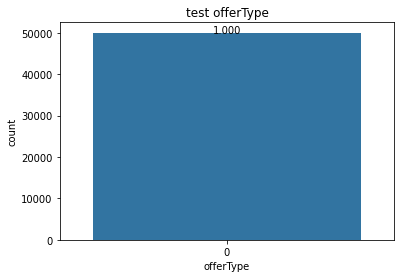

In [27]:
for column in df_test.columns:
    if df_test[column].unique().shape[0] < 20:
        tmp = df_test[[column]].copy()
        tmp.fillna('missing', inplace=True)
        ax = sns.countplot(x=column, data=tmp,
                           order=tmp[column].value_counts().index)
        for p in ax.patches:
            height = p.get_height()
            x = p.get_x()+p.get_width()/2
            y = height + 4
            percentage = '{:1.3f}'.format(height/df_test.shape[0])
            ax.text(x, y, percentage, ha="center")
        plt.title(f'test {column}')
        plt.show()

In [28]:
# seller字段和offerType字段数据倾斜严重或者方差为0 可以直接删除
del df_train["seller"]
del df_train["offerType"]
del df_test["seller"]
del df_test["offerType"]

## 观测预测值的分布

偏度: 3.346487
峰度: 18.995183


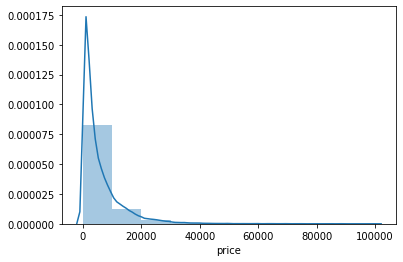

In [29]:
sns.distplot(df_train['price'], bins=10)
# 偏度大于0 左偏；偏度小于0 右偏
# 峰度等于0 正态 大于0 高尖 小于0 矮胖
print("偏度: %f" % df_train['price'].skew())
print("峰度: %f" % df_train['price'].kurt())

In [30]:
# 由于预测值是偏态分布，我们通常预测它的对数，对数后基本符合正态分布

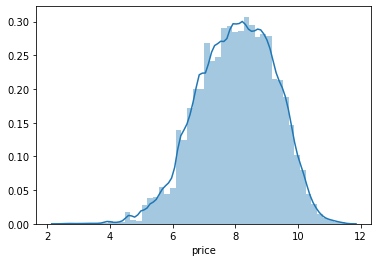

In [31]:
sns.distplot(np.log(df_train['price']+1))

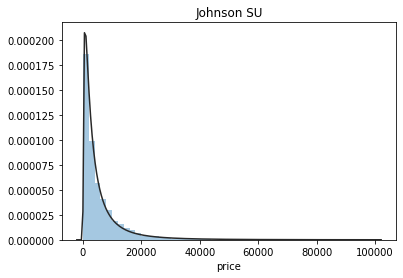

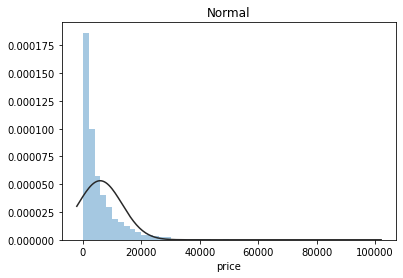

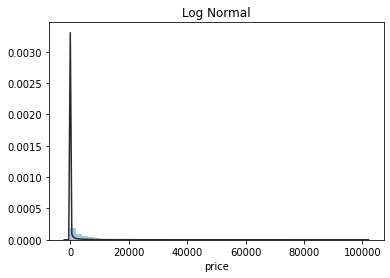

In [32]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = df_train['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

## 特征观测

In [33]:
# 分离label
y_train = df_train['price']

### 特征分类

In [34]:
# 数值型变量
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
                    'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']

# 类别型变量
categorical_features = ['name', 'model', 'brand', 'bodyType',
                        'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']
# 日期型变量
date_features = ['regDate', 'creatDate']

### 离散型特征分析

In [35]:
# 特征nunique分布
for cat_fea in categorical_features:
    print('===='*10)
    print("训练集【{}】特征有{}个不同的值".format(cat_fea, df_train[cat_fea].nunique()))
    print("预测集【{}】特征有{}个不同的值".format(cat_fea, df_test[cat_fea].nunique()))

训练集【name】特征有99662个不同的值
预测集【name】特征有37453个不同的值
训练集【model】特征有248个不同的值
预测集【model】特征有247个不同的值
训练集【brand】特征有40个不同的值
预测集【brand】特征有40个不同的值
训练集【bodyType】特征有8个不同的值
预测集【bodyType】特征有8个不同的值
训练集【fuelType】特征有7个不同的值
预测集【fuelType】特征有7个不同的值
训练集【gearbox】特征有2个不同的值
预测集【gearbox】特征有2个不同的值
训练集【notRepairedDamage】特征有2个不同的值
预测集【notRepairedDamage】特征有2个不同的值
训练集【regionCode】特征有7905个不同的值
预测集【regionCode】特征有6971个不同的值


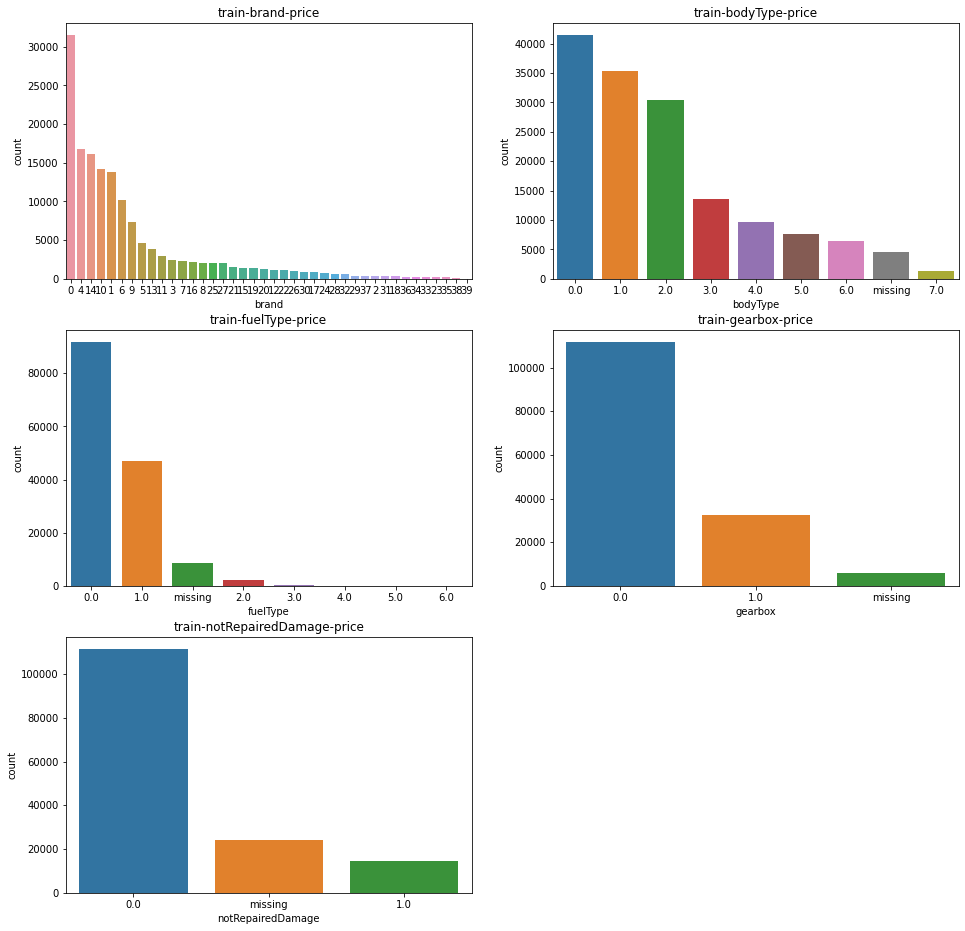

In [36]:
f, ax = plt.subplots(figsize=(16, 16))
ob_cat_feature = ['brand','bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']
tmp_df = df_train.fillna('missing')
for i, cat_feature in enumerate(ob_cat_feature):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=cat_feature,data=tmp_df,order=tmp_df[cat_feature].value_counts().index)
    plt.title(f'train-{cat_feature}-price')
plt.show()

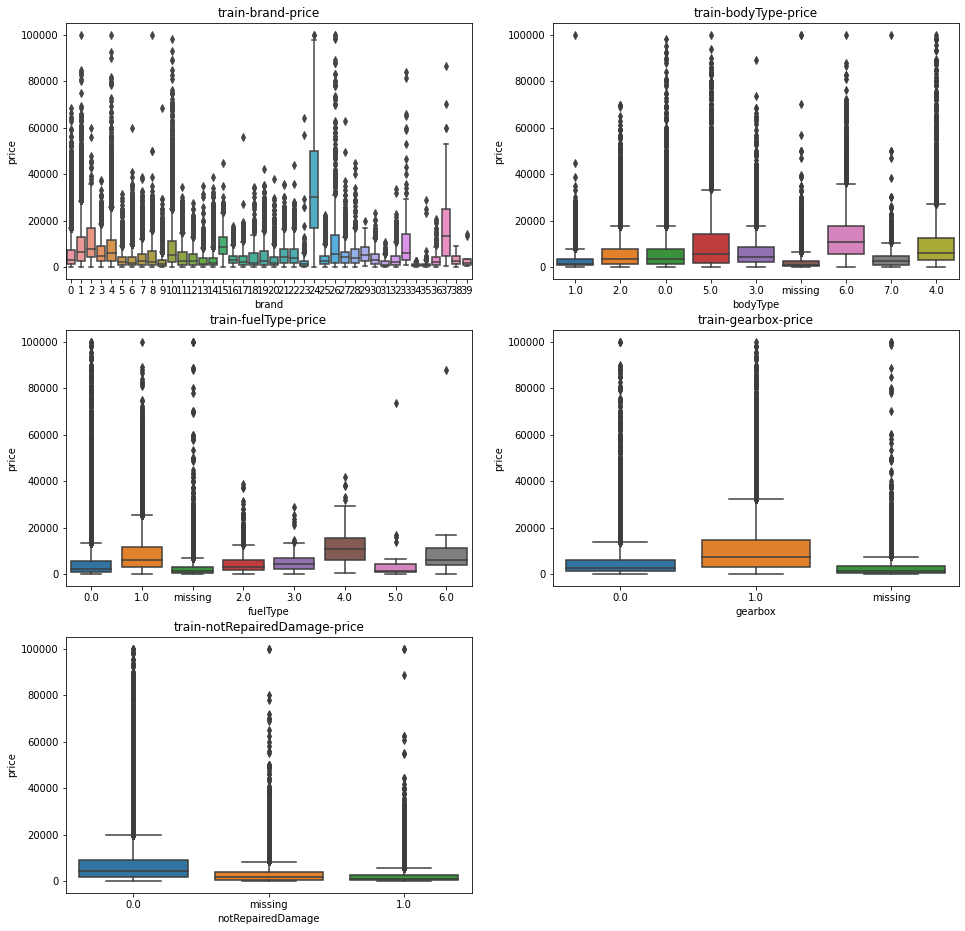

In [37]:
f, ax = plt.subplots(figsize=(16, 16))
for i, cat_feature in enumerate(ob_cat_feature):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=cat_feature, y='price', data=tmp_df)
    plt.title(f'train-{cat_feature}-price')
plt.show()

### 连续型变量分析

In [38]:
numeric_features.append('price')

In [39]:
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

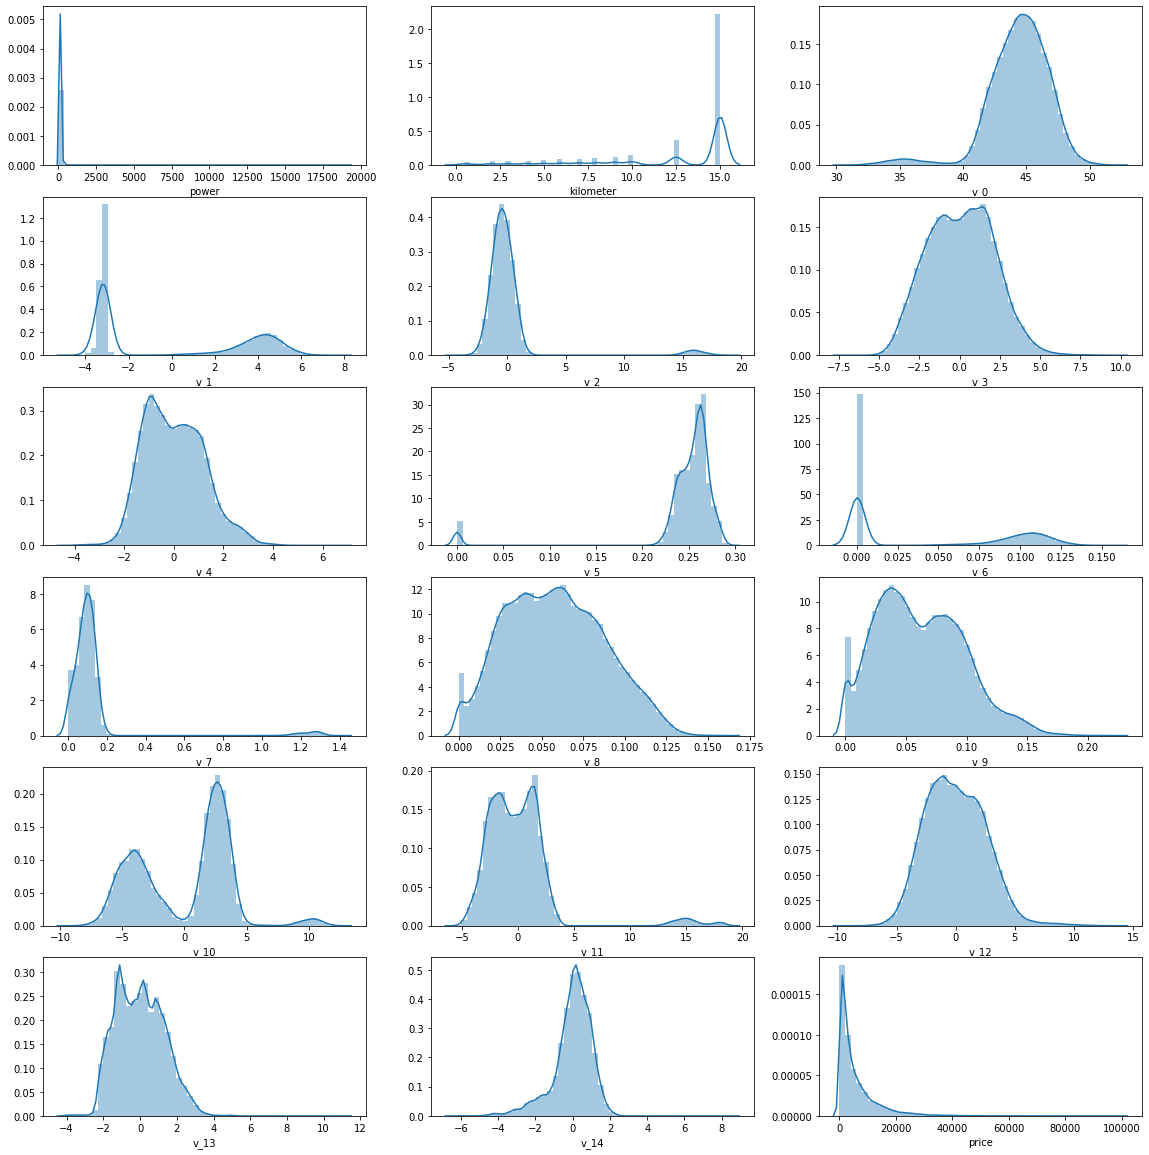

In [40]:
f, ax = plt.subplots(figsize=(16, 16))
plt.tight_layout()
for i, feature in enumerate(numeric_features):
    plt.subplot(6, 3, i+1)
    sns.distplot(df_train[feature])
#     plt.title(f'train-{feature}')
plt.show()

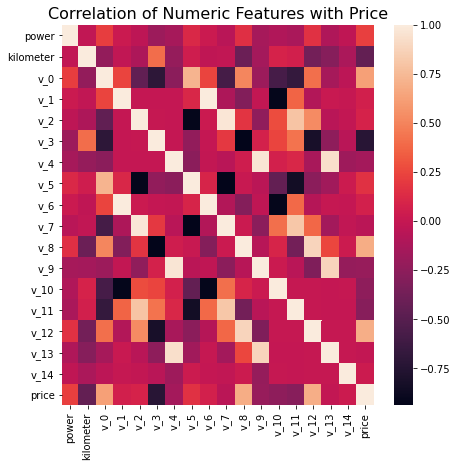

In [41]:
# df_train.head()
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Correlation of Numeric Features with Price', y=1, size=16)

sns.heatmap(df_train[numeric_features].corr(method='pearson'))

In [42]:
corr_list = []
for column in numeric_features:
    if column=='price':
        continue
    corr = round(df_train[[column,'price']].corr(method='pearson').iloc[0,1],3)
    corr_list.append((column,corr))
corr_list = sorted(corr_list,key=lambda x:x[1],reverse=True)
corr_list

[('v_12', 0.693),
 ('v_8', 0.686),
 ('v_0', 0.628),
 ('power', 0.22),
 ('v_5', 0.164),
 ('v_2', 0.085),
 ('v_6', 0.069),
 ('v_1', 0.061),
 ('v_14', 0.036),
 ('v_13', -0.014),
 ('v_7', -0.053),
 ('v_4', -0.147),
 ('v_9', -0.206),
 ('v_10', -0.246),
 ('v_11', -0.275),
 ('kilometer', -0.441),
 ('v_3', -0.731)]

In [43]:
f=pd.melt(df_train,value_vars=numeric_features)
f

,variable,value
0,power,60.0
1,power,0.0
2,power,163.0
3,power,193.0
4,power,68.0
...,...,...
2699995,price,5900.0
2699996,price,9500.0
2699997,price,7500.0
2699998,price,4999.0


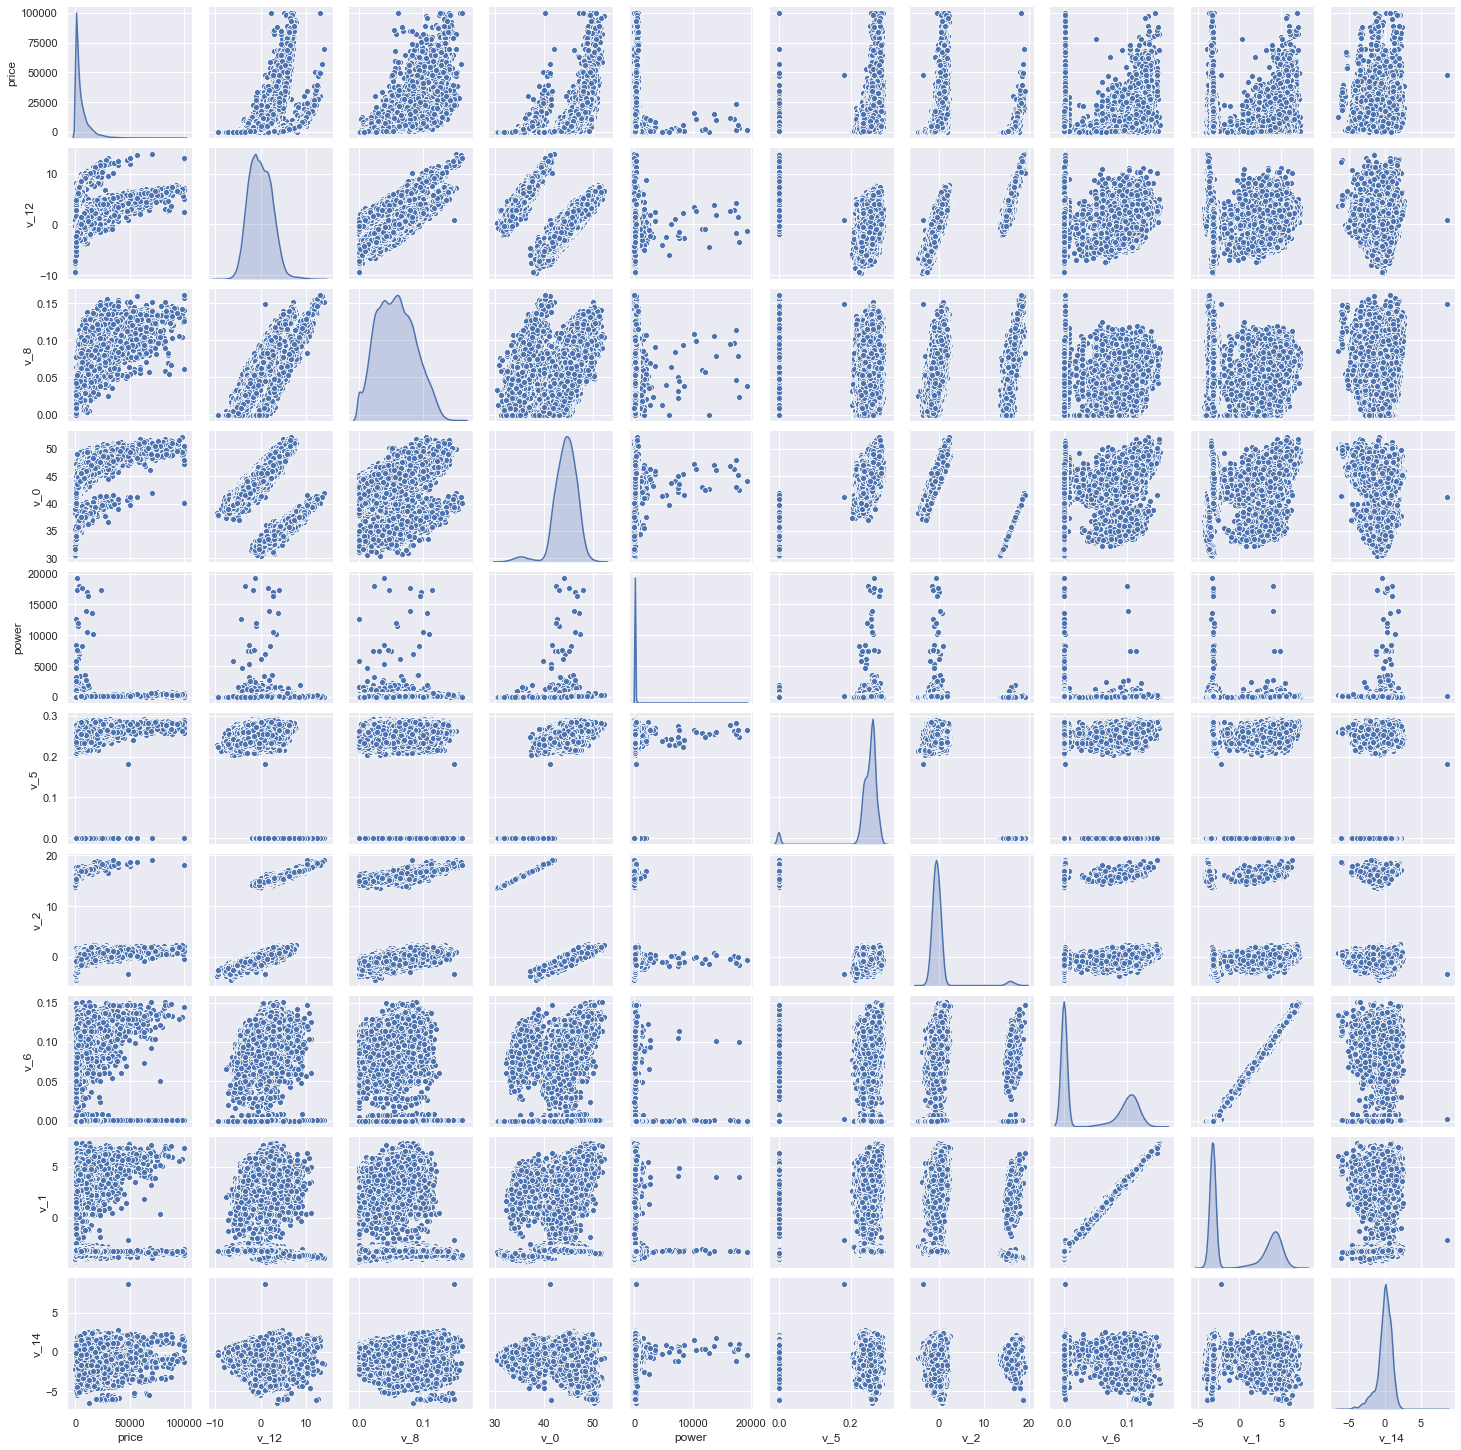

In [44]:
# 4) 数字特征相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8', 'v_0',
           'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(df_train[columns], size=2, kind='scatter', diag_kind='kde')
plt.show()

In [45]:
tmp = df_train[numeric_features].corr()
tmp[(tmp > 0.9) | (tmp < -0.9)]

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price
power,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kilometer,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v_0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v_1,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.999415,NaN,NaN,NaN,-0.921904,NaN,NaN,NaN,NaN,NaN
v_2,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,-0.921857,NaN,0.973689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v_3,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,-0.933161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v_4,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.962928,NaN,NaN,NaN,0.93458,NaN,NaN
v_5,NaN,NaN,NaN,NaN,-0.921857,NaN,NaN,1.000000,NaN,-0.939385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v_6,NaN,NaN,NaN,0.999415,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,-0.917056,NaN,NaN,NaN,NaN,NaN
v_7,NaN,NaN,NaN,NaN,0.973689,NaN,NaN,-0.939385,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


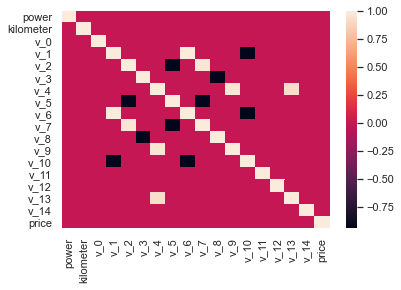

In [46]:
sns.heatmap(tmp[(tmp>0.9)|(tmp<-0.9)].fillna(0))

### 日期特征分析

In [47]:
print(f'训练集最早注册时间:{df_train.regDate.min()},最晚注册时间:{df_train.regDate.max()}')
print(f'训练集最早上线时间:{df_train.creatDate.min()},最晚上线时间:{df_train.creatDate.max()}')
print('='*20)
print(f'测试集最早注册时间:{df_test.regDate.min()},最晚注册时间:{df_test.regDate.max()}')
print(f'测试集最早上线时间:{df_test.creatDate.min()},最晚上线时间:{df_test.creatDate.max()}')

训练集最早注册时间:19910001,最晚注册时间:20151212
训练集最早上线时间:20150618,最晚上线时间:20160407
测试集最早注册时间:19910001,最晚注册时间:20151211
测试集最早上线时间:20150611,最晚上线时间:20160407


In [60]:
df_train[['regDate','creatDate']]
# 处理月份为0的情况
def clean_error_month(x):
    x = str(x)
    if len(x)!=8:
        return pd.NaT
    if x[4:6]=='00':
        x = x[:4]+'01'+x[6:]
    return x

df_train['regDate'] = df_train['regDate'].apply(clean_error_month)
df_test['regDate'] = df_test['regDate'].apply(clean_error_month)

In [70]:
df_train['used_days'] = (pd.to_datetime(df_train['creatDate'], format='%Y%m%d') -
                         pd.to_datetime(df_train['regDate'], format='%Y%m%d')).dt.days
df_test['used_days'] = (pd.to_datetime(df_test['creatDate'], format='%Y%m%d') -
                        pd.to_datetime(df_test['regDate'], format='%Y%m%d')).dt.days

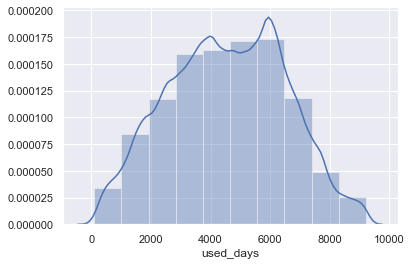

In [73]:
sns.distplot(df_train['used_days'],bins=10)

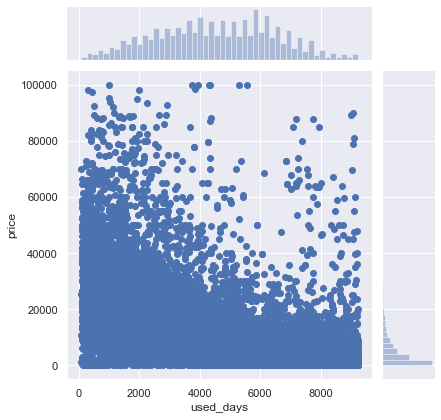

In [74]:
sns.jointplot(x='used_days', y='price', data=df_train)

In [80]:
df_train['year'] = pd.to_datetime(df_train['creatDate'], format='%Y%m%d').dt.year
df_train['month'] = pd.to_datetime(df_train['creatDate'], format='%Y%m%d').dt.month
df_train['quarter'] = pd.to_datetime(df_train['creatDate'], format='%Y%m%d').dt.quarter

In [85]:
df_train.year.value_counts()

2016    149982
2015        18
Name: year, dtype: int64

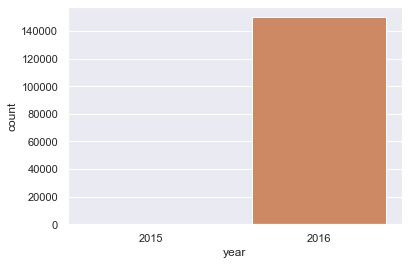

In [83]:
sns.countplot(df_train.year)

3     125426
4      24344
2        185
1         27
11         7
12         5
9          3
8          2
6          1
Name: month, dtype: int64


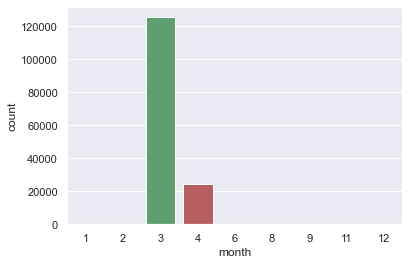

In [87]:
print(df_train.month.value_counts())
sns.countplot(df_train.month)

In [88]:
df_train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_9,v_10,v_11,v_12,v_13,v_14,used_days,month,year,quarter
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,4385,4,2016,2
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,4757,3,2016,1
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,4382,4,2016,2
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,7125,3,2016,1
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1531,3,2016,1


In [90]:
df_train[(df_train['regDate']>'20060301')&(df_train['regDate']<'20060399')]

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_9,v_10,v_11,v_12,v_13,v_14,used_days,month,year,quarter
180,180,117099,20060310,17.0,10,0.0,1.0,1.0,224,15.0,...,0.026398,-5.181322,0.944600,1.132304,-1.149389,0.340846,3671,3,2016,1
408,408,14603,20060304,19.0,1,4.0,0.0,1.0,200,15.0,...,0.032584,-6.325812,0.550041,1.000384,-1.119748,0.413800,3669,3,2016,1
442,442,5448,20060307,49.0,1,2.0,1.0,0.0,179,15.0,...,0.026771,-4.877699,0.891050,1.656127,-1.146855,0.388753,3675,3,2016,1
669,669,4209,20060303,66.0,9,2.0,NaN,0.0,136,15.0,...,0.112926,-3.968968,1.916634,-1.459875,1.416704,-0.049884,3676,3,2016,1
673,673,89924,20060302,29.0,0,1.0,1.0,0.0,101,15.0,...,0.063063,2.707287,-1.331308,1.318209,0.882134,1.122942,3679,3,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149240,149240,47608,20060302,107.0,25,1.0,0.0,0.0,60,9.0,...,0.168549,-3.277163,1.857733,-0.037422,2.654750,-2.028448,3659,3,2016,1
149399,149399,1969,20060302,11.0,10,0.0,0.0,0.0,95,4.0,...,0.043349,-4.309617,0.797632,0.613261,-0.363983,0.826680,3673,3,2016,1
149610,149610,43056,20060310,8.0,0,2.0,0.0,0.0,200,12.5,...,0.041237,2.090901,-2.368407,2.120910,-0.116855,1.086342,3648,3,2016,1
149950,149950,79082,20060302,172.0,14,4.0,0.0,0.0,90,12.5,...,0.100885,2.177795,-2.724560,0.024629,1.781277,0.213891,3684,4,2016,2


In [93]:
df_train['regionCode'].value_counts()

419     369
764     258
125     137
176     136
462     134
       ... 
6414      1
7063      1
4239      1
5931      1
7267      1
Name: regionCode, Length: 7905, dtype: int64

In [92]:
df_train[['regDate','creatDate','regionCode']]

,regDate,creatDate,regionCode
0,20040402,20160404,1046
1,20030301,20160309,4366
2,20040403,20160402,2806
3,19960908,20160312,434
4,20120103,20160313,6977
...,...,...,...
149995,20000607,20160327,4576
149996,20091102,20160312,2826
149997,20100103,20160328,3302
149998,20060312,20160401,1877
